<a href="https://colab.research.google.com/github/shivayapandey/cartoon-image/blob/main/cartoon_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import cv2

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  img =cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

In [ ]:
filename = "dog3.jpg"
img=read_file(filename)

org_img=np.copy(img)


Image loaded successfully


In [ ]:
def edge_mask(img , line_size, blur_value):
  gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

  return edges

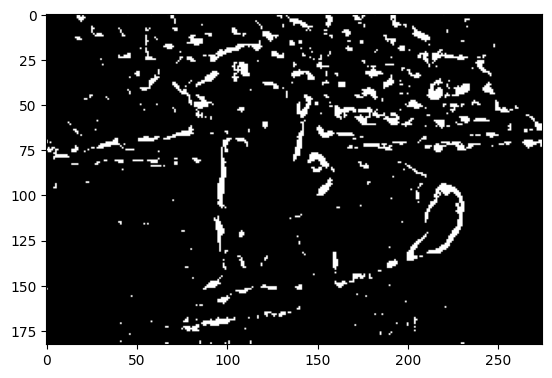

In [ ]:
 img = cv2.imread("dog3.jpg")
 line_size,blur_value=7,7
 edges=edge_mask(img , line_size, blur_value)

 plt.imshow(edges, cmap="binary")
 plt.show()

In [ ]:

def color_quantization(img, k):
    # Reshape image to a 2D array of pixels
    data = np.float32(img).reshape(-1, 3)

    # Define criteria for k-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Apply k-means clustering
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert the center values to 8-bit unsigned integers
    center = np.uint8(center)

    # Map the labels to the center values to get the quantized result
    result = center[label.flatten()]

    # Reshape the result back to the original image shape
    result = result.reshape(img.shape)

    return result




In [ ]:
 blurred= cv2.bilateralFilter(img, d=3,sigmaColor=200, sigmaSpace=200)

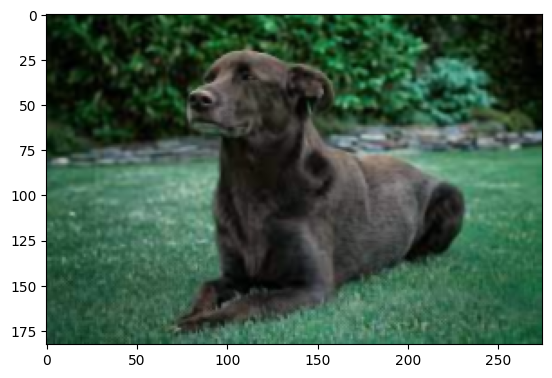

In [ ]:
 img_quantiz = color_quantization(img,k=5)


 plt.imshow(blurred)
 plt.show()

In [ ]:
def cartoon():
  c=cv2.bitwise_and(blurred, blurred, mask=edges)

  plt.imshow(org_img)
  plt.title("org_img")
  plt.show()

  plt.imshow(c)
  plt.title("Cartoonified image")
  plt.show()




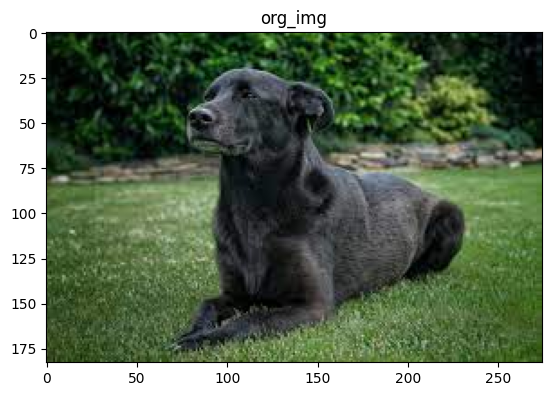

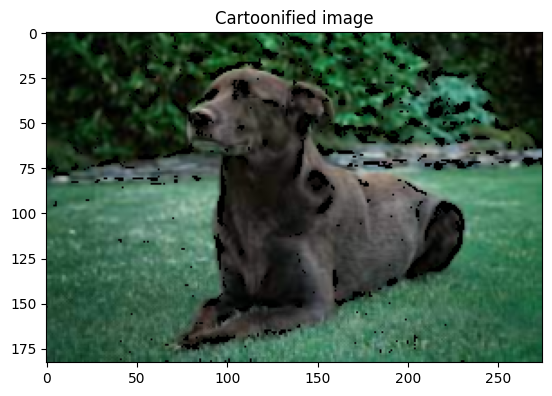

In [ ]:
cartoon()